# 羅吉斯迴歸 Logistic Regression

In [1]:
from sklearn import datasets # 鳶尾花
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
# 資料
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 答案
y = pd.DataFrame(iris['target'], columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
# 水平合併
iris_Data = pd.concat([x,y], axis=1)
iris_Data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# 花瓣與花萼長度
iris_Data = iris_Data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_Data = iris_Data[iris_Data['target'].isin([0,1])] # isin([0,1]) 抓取種類0跟1的

In [6]:
iris_Data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [7]:
iris_Data.tail()

,sepal length (cm),petal length (cm),target
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1
99,5.7,4.1,1


In [8]:
# 訓練與測試分割
from sklearn.model_selection import train_test_split
# iris_Data[['target']] 兩個中括弧才抓的到裡面的資料 -> 抓取iris_Data資料中的target欄位
X_train, X_test, y_train, y_test = train_test_split(iris_Data[['sepal length (cm)', 'petal length (cm)']], iris_Data[['target']], test_size=0.3, random_state=0) # random_state 隨機種子

In [9]:
# 平均值和標準差的方法：將所有特徵標準化，也就是高斯分布，使數據平均值為0，方差為1，適合的使用時機於當有些特徵的方差(標準差)過大時，使用標準化能夠有效的讓模型快速收斂。
# 例子：房價 -> 浮度太大； 影像辨識 -> 色階浮度太大(除255降低範圍)， 當收斂後，準度會提升
from sklearn.preprocessing import StandardScaler

# 建模
sc = StandardScaler()

# 訓練
# 使用StandardScaler()中fit的方法，計算訓練資料中每個特徵的均值和標準差，可以保證每個維度的數據方差為1，均值為0。
sc.fit(X_train)

# std 標準差
# 必須先使用fit，才能使用transform
# transform: 使用該類的好處在於可以保存訓練集中的參數(均值和方差)，直接使用其對象轉換測試集數據。
# 調用trasform方法可以使用計算得到的均值和方差來對訓練數據做標準化處理。
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
X_train_std

array([[-0.80800774,  0.43666598],
       [ 0.01648995,  0.64460217],
       [ 0.01648995,  1.06047453],
       [ 1.17078673,  1.12978659],
       [ 1.50058581,  1.12978659],
       [-0.47820866, -0.94957523],
       [ 0.34628903, -0.81095111],
       [ 1.33568627,  1.26841071],
       [ 1.00588719,  1.26841071],
       [ 1.50058581,  0.99116247],
       [-0.97290728, -1.01888729],
       [ 0.67608811,  0.92185041],
       [-1.79740498, -1.08819936],
       [-1.63250544, -1.08819936],
       [-0.80800774, -1.01888729],
       [ 0.34628903, -0.94957523],
       [-0.6431082 , -1.01888729],
       [-0.80800774, -1.08819936],
       [-1.79740498, -1.08819936],
       [-0.14840959, -0.81095111],
       [ 1.00588719,  1.19909865],
       [-0.47820866,  0.71391423],
       [-0.6431082 , -1.01888729],
       [-0.97290728, -0.94957523],
       [-0.47820866, -1.01888729],
       [ 2.48998304,  1.26841071],
       [-1.13780682, -0.88026317],
       [-0.80800774, -1.15751142],
       [-0.6431082 ,

In [11]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [12]:
# 羅吉斯迴歸
from sklearn.linear_model import LogisticRegression

# 建模
lr = LogisticRegression()

# 訓練
# 將標準差代入
lr.fit(X_train_std, y_train['target'].values)

LogisticRegression()

In [13]:
# 預測
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [14]:
# 答案
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
# 給予比例
lr.predict_proba(X_test_std)

array([[0.93606171, 0.06393829],
       [0.00497007, 0.99502993],
       [0.97297313, 0.02702687],
       [0.01892083, 0.98107917],
       [0.01007719, 0.98992281],
       [0.30602173, 0.69397827],
       [0.94913163, 0.05086837],
       [0.0086973 , 0.9913027 ],
       [0.00735109, 0.99264891],
       [0.03454645, 0.96545355],
       [0.06120019, 0.93879981],
       [0.04688146, 0.95311854],
       [0.01434288, 0.98565712],
       [0.9875209 , 0.0124791 ],
       [0.94733967, 0.05266033],
       [0.94642148, 0.05357852],
       [0.98655365, 0.01344635],
       [0.90494712, 0.09505288],
       [0.93254052, 0.06745948],
       [0.97489243, 0.02510757],
       [0.93606171, 0.06393829],
       [0.03916972, 0.96083028],
       [0.96322075, 0.03677925],
       [0.03578511, 0.96421489],
       [0.96386204, 0.03613796],
       [0.93138299, 0.06861701],
       [0.96986241, 0.03013759],
       [0.04211754, 0.95788246],
       [0.05699625, 0.94300375],
       [0.00368696, 0.99631304]])

## 繪圖方式

### 函式

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # 標記
  markers = ('s', 'x', 'o', '^')
  colors = ('red', 'blue', 'gray', 'cyan')
  # ListedColormap顏色列表(colors[:len(np.unique過濾重複項(y))])
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # 最小最大值
  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1

  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
  # np.meshgrid 兩個座標軸上的點在平面上畫格線
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  # 分類器
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  # 等高線
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    # 散圖， edgecolor='black' 散點的邊緣框是黑色
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


### 圖

<ipython-input-16-f927df3b5654>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)
<ipython-input-16-f927df3b5654>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.6, c=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


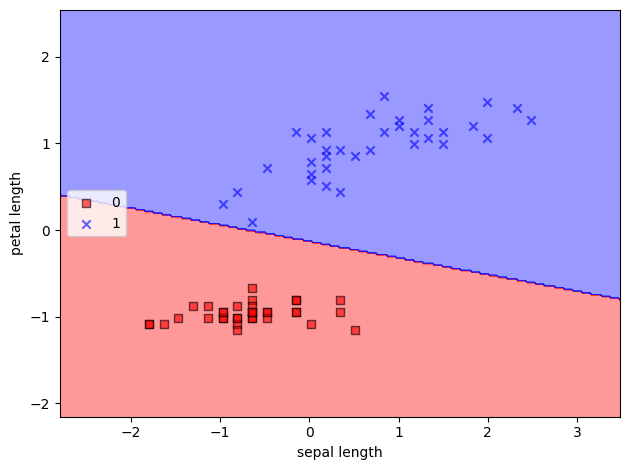

In [17]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc=6)
plt.tight_layout()
plt.show()

## 範例

假設值是 -1,0,1,-2,2

均值為 (-1+0+1+-2+2)/5=0

方差(標準差)為 ((-1)^2 +0^2 +1^2 + (-2)^2 +2^2 )/5 = 2

In [18]:
from sklearn.preprocessing import StandardScaler

# 建模
sc = StandardScaler()

sx = [[5.0,3.5], [5.5,3.8], [5.0,1.0], [5.5,1.4]]
sc.fit(sx)
# 標準差(全部加起來是0)
x_std = sc.transform(sx)
x_std

array([[-1.        ,  0.86855395],
       [ 1.        ,  1.1109411 ],
       [-1.        , -1.15133896],
       [ 1.        , -0.82815609]])